<a href="https://colab.research.google.com/github/rajayourfriend/EIP_Assignments/blob/master/EIP4_Assignment3_004_01_good_submitted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


### Find the GPU allocated

In [2]:
!nvidia-smi

Tue Dec  3 14:21:25 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
!sudo apt-get install lshw
!lshw -numeric -C display

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libpci3 pciutils usbutils
The following NEW packages will be installed:
  libpci3 lshw pciutils usbutils
0 upgraded, 4 newly installed, 0 to remove and 32 not upgraded.
Need to get 721 kB of archives.
After this operation, 2,870 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libpci3 amd64 1:3.5.2-1ubuntu1.1 [24.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 lshw amd64 02.18-0.1ubuntu6.18.04.1 [231 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 pciutils amd64 1:3.5.2-1ubuntu1.1 [257 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 usbutils amd64 1:007-4build1 [208 kB]
Fetched 721 kB in

### Dataset

In [4]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 4s 0us/step


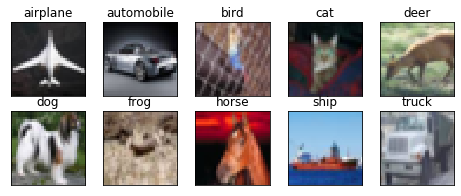

In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:

from keras.preprocessing.image import ImageDataGenerator



RAJA = True







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_lau



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)     

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`





Epoch 1/50





390/390 [==============================] - 29s 73ms/step - loss: 1.8907 - acc: 0.2719 - val_loss: 1.4893 - val_acc: 0.4472
Epoch 2/50
390/390 [==============================] - 20s 51ms/step - loss: 1.3580 - acc: 0.5073 - val_loss: 1.1489 - val_acc: 0.5958
Epoch 3/50
390/390 [==============================] - 20s 51ms/step - loss: 1.1195 - acc: 0.6061 - val_loss: 0.9543 - val_acc: 0.6671
Epoch 4/50
390/390 [==============================] - 20s 52ms/step - loss: 0.9684 - acc: 0.6645 - val_loss: 0.8725 - val_acc: 0.6966
Epoch 5/50
390/390 [==============================] - 20s 52ms/step - loss: 0.8709 - acc: 0.7001 - val_loss: 0.7702 - val_acc: 0.7351
Epoch 6/50
390/390 [==============================] - 21s 53ms/step - loss: 0.7857 - acc: 0.7298 - val_loss: 0.7388 - val_acc: 0.7500
Epoch 7/50
390/390 [==============================] - 20s 52ms/step - loss: 0.7441 - acc: 0.7485 - val_loss: 0.6706 - val_acc: 0.7717
Epoch 8/50
390/390 [==============================] - 

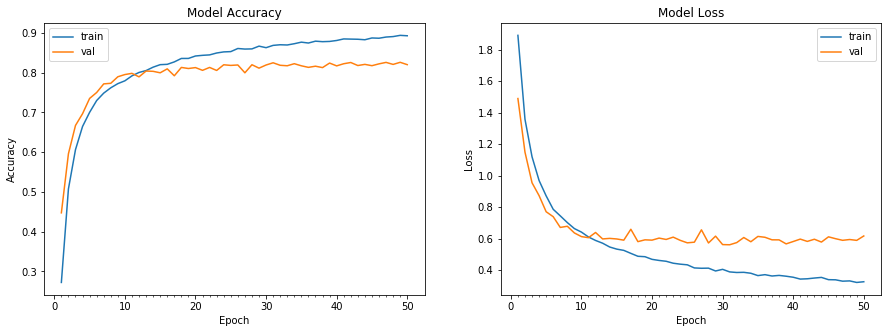

Accuracy on test data is: 82.01


In [0]:
if RAJA == False: #Given by Rohan
    # Define the model
    model = Sequential()
    model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Convolution2D(48, 3, 3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Convolution2D(96, 3, 3, border_mode='same'))
    model.add(Activation('relu'))
    model.add(Convolution2D(96, 3, 3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Convolution2D(192, 3, 3, border_mode='same'))
    model.add(Activation('relu'))
    model.add(Convolution2D(192, 3, 3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.summary()

    # train the model
    start = time.time()
    # Train the model
    datagen = ImageDataGenerator(zoom_range=0.0, 
                            horizontal_flip=False)
    model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                    samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                    validation_data = (test_features, test_labels), verbose=1)
    end = time.time()
    print ("Model took %0.2f seconds to train"%(end - start))
    # plot model history
    plot_model_history(model_info)
    # compute test accuracy
    print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Raja Assignment begin

###To avoid Overfitting
* Reduce number of parameters
* Add Dropout
* Add ImgAug (pad, crop, cutout)
* L2 regularization
* Momentum
* Learning Rate













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(10, (1, 1), depth_multiplier=3, use_bias=False, name="PointwiseDwsConv")`




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FirstDwsConv (SeparableConv2 (None, 30, 30, 60)        621       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 60)        240       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 60)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 60)        0         
_________________________________________________________________
SecondDwsConv (SeparableConv (None, 28, 28, 60)        12420     
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 60)        240       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 60)     

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:104: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:104: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`




Epoch 1/50
390/390 [==============================] - 39s 99ms/step - loss: 1.4610 - acc: 0.5001 - val_loss: 1.3249 - val_acc: 0.5454

Epoch 00001: val_acc improved from -inf to 0.54540, saving model to /opt/saved_weight_file.hdf5
Epoch 2/50
390/390 [==============================] - 33s 86ms/step - loss: 1.1031 - acc: 0.6340 - val_loss: 1.0807 - val_acc: 0.6313

Epoch 00002: val_acc improved from 0.54540 to 0.63130, saving model to /opt/saved_weight_file.hdf5
Epoch 3/50
390/390 [==============================] - 34s 86ms/step - loss: 0.9574 - acc: 0.6819 - val_loss: 1.0831 - val_acc: 0.6303

Epoch 00003: val_acc did not improve from 0.63130
Epoch 4/50
390/390 [==============================] - 33s 86ms/step - loss: 0.8618 - acc: 0.7154 - val_loss: 0.9370 - val_acc: 0.6784

Epoch 00004: val_acc improved from 0.63130 to 0.67840, saving model to /opt/saved_weight_file.hdf5
Epoch 5/50
390/390 [==============================] - 33s 86ms/step - loss: 0.7854 - acc: 0.7372 - val_loss: 0.894

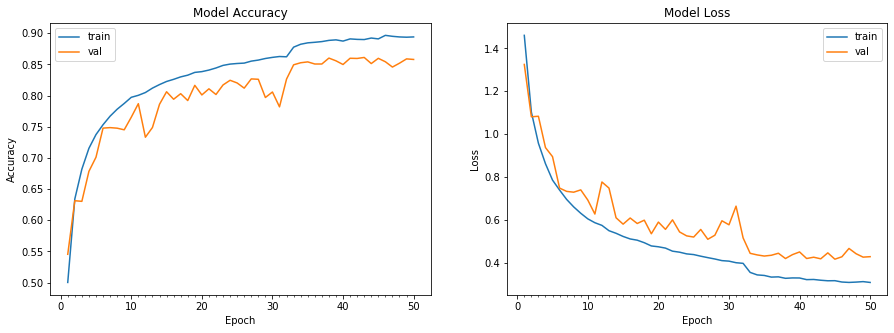

Accuracy on test data is: 86.10


In [10]:


#SeparableConv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), depth_multiplier=1, activation=None, use_bias=True, 
#                depthwise_initializer='glorot_uniform', pointwise_initializer='glorot_uniform', bias_initializer='zeros', depthwise_regularizer=None, 
#                pointwise_regularizer=None, bias_regularizer=None, activity_regularizer=None, depthwise_constraint=None, pointwise_constraint=None, bias_constraint=None)
import keras

d = 0.1
f = 60
dm = 3
isDropout = True
#target val_acc = 82.6
if RAJA == True: # Developed by Raja 
    # Define the model
    model2 = Sequential()
    #filters become output channels (filter count of 1x1)
    #depth_multiplier may be assumed as the channel of kernels (in legacy 3x3 conv)
    #filters = 3x3x1 filter count
    #depth_multiplier = 1x1 filter count

    layer1f = f #layer 1 filter count
    model2.add(SeparableConv2D(filters=layer1f, kernel_size=(3, 3), depth_multiplier=dm, input_shape=(32, 32, 3), use_bias=False, name="FirstDwsConv"))#30
    #RF=3
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    if isDropout:
      model2.add(Dropout(d))
    layer2f = f #layer 2 filter count
    model2.add(SeparableConv2D(filters=layer2f, kernel_size=3, depth_multiplier=dm, use_bias=False, name="SecondDwsConv"))#28
    #RF=5
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    if isDropout:
      model2.add(Dropout(d))
    layer3f = f #layer 3 filter count
    model2.add(SeparableConv2D(filters=layer3f, kernel_size=3, depth_multiplier=dm, use_bias=False, name="ThirdDwsConv"))#26
    #RF=7
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    if isDropout:
      model2.add(Dropout(d))
    
    model2.add(MaxPooling2D(pool_size=(2, 2)))#13
    #RF=8
    model2.add(SeparableConv2D(10, 1, 1, depth_multiplier=dm, use_bias=False, name="PointwiseDwsConv"))#13
    #RF=8

    layer4f = f #layer 4 filter count
    model2.add(SeparableConv2D(filters=layer4f, kernel_size=(3, 3), depth_multiplier=dm, use_bias=False, padding='same', name="FourthDwsConv"))#13
    #RF=12
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    if isDropout:
      model2.add(Dropout(d))
    layer5f = f #layer 5 filter count
    model2.add(SeparableConv2D(filters=layer5f, kernel_size=(3, 3), depth_multiplier=dm, use_bias=False, padding='same', name="FifthDwsConv"))#13
    #RF=16
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    if isDropout:
      model2.add(Dropout(d))
    
    layer6f = f #layer 6 filter count
    model2.add(SeparableConv2D(filters=layer6f, kernel_size=(3, 3), depth_multiplier=dm, use_bias=False, padding='same', name="SixthDwsConv"))#13
    #RF=20
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    if isDropout:
      model2.add(Dropout(d))
    layer7f = f #layer 7 filter count
    model2.add(SeparableConv2D(filters=layer7f, kernel_size=(3, 3), depth_multiplier=dm, use_bias=False, name="SeventhDwsConv"))#11
    #RF=24
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    if isDropout:
      model2.add(Dropout(d))
    layer8f = f #layer 8 filter count
    model2.add(SeparableConv2D(filters=layer8f, kernel_size=(3, 3), depth_multiplier=dm, use_bias=False, name="EighthDwsConv"))#7
    #RF=28
    model2.add(BatchNormalization())
    
    model2.add(SeparableConv2D(filters=10, kernel_size=(3, 3), depth_multiplier=dm, use_bias=False, name="NinethDwsConv"))#5
    #RF=32
    model2.add(BatchNormalization())

    #model2.add(Flatten())
    model2.add(GlobalAveragePooling2D())
    model2.add(Activation('softmax'))

    # Compile the model
    model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model2.summary()
    # train the model
    start = time.time()
    # Train the model
    datagen2 = ImageDataGenerator(zoom_range=0.0, 
                            horizontal_flip=True)
    snapshot_filepath = "/opt/saved_weight_file.hdf5"
    cp_callback = keras.callbacks.ModelCheckpoint(snapshot_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)
    CALLBACKS = [cp_callback, lr_scheduler]
    model_info = model2.fit_generator(datagen2.flow(train_features, train_labels, batch_size = 128),
                                    samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                    validation_data = (test_features, test_labels), verbose=1,
                                    callbacks = CALLBACKS)
    end = time.time()
    print ("Model took %0.2f seconds to train"%(end - start))
    # plot model history
    plot_model_history(model_info)
    # compute test accuracy
    model2.load_weights(snapshot_filepath)
    print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model2))